<a href="https://colab.research.google.com/github/Nusaibah111/Housing-price-prediction/blob/main/Housing_price_code_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np

In [ ]:
import pandas as pd

# Now load your dataset
df = pd.read_csv('/content/Housing Price.csv')
df.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420.0,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960.0,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960.0,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished


In [ ]:
# Fill NaN values for numeric columns only
df.fillna(df.select_dtypes(include=[np.number]).mean(), inplace=True)


In [ ]:
# Fill NaN values in categorical columns with the mode (most frequent value)
df.fillna(df.select_dtypes(include=['object']).mode().iloc[0], inplace=True)


In [ ]:
# Check for null values
print(df.isnull().sum())


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [ ]:
#droping null values
df.dropna(inplace=True)

In [ ]:
#checking if any null value left
df.isnull().values.any()

False

In [ ]:
# Remove duplicate rows if present
df.drop_duplicates(inplace=True)

# Verify if duplicates were removed
print(f"Total rows after removing duplicates: {len(df)}")


Total rows after removing duplicates: 545


In [ ]:
# One-hot encoding categorical variables
df = pd.get_dummies(df, drop_first=True)


In [ ]:
# Check column names in the DataFrame
print(df.columns)


Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes',
       'airconditioning_yes', 'prefarea_yes',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')


In [ ]:
# Example of creating a single column for 'furnishingstatus'
df['furnishingstatus'] = df[['furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']].idxmax(axis=1)

# Apply Label Encoding to the 'furnishingstatus' column
label_encoder = LabelEncoder()
df['furnishingstatus_encoded'] = label_encoder.fit_transform(df['furnishingstatus'])


In [ ]:
df['furnishingstatus'] = df[['furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']].idxmax(axis=1)


In [ ]:
label_encoder = LabelEncoder()
df['furnishingstatus_encoded'] = label_encoder.fit_transform(df['furnishingstatus'])


In [ ]:
# Drop the old binary columns
df.drop(['furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'], axis=1, inplace=True)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling to numerical columns
numerical_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Apply scaling to numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [ ]:
print(df.dtypes)


price                       float64
area                        float64
bedrooms                    float64
bathrooms                   float64
stories                     float64
parking                     float64
mainroad_yes                   bool
guestroom_yes                  bool
basement_yes                   bool
hotwaterheating_yes            bool
airconditioning_yes            bool
prefarea_yes                   bool
furnishingstatus             object
furnishingstatus_encoded      int64
dtype: object


In [ ]:
# Select numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print(correlation_matrix)


                             price      area  bedrooms  bathrooms   stories  \
price                     1.000000  0.513133  0.342946   0.498598  0.433029   
area                      0.513133  1.000000  0.118208   0.159484  0.076078   
bedrooms                  0.342946  0.118208  1.000000   0.360723  0.410182   
bathrooms                 0.498598  0.159484  0.360723   1.000000  0.326561   
stories                   0.433029  0.076078  0.410182   0.326561  1.000000   
parking                   0.352418  0.351616  0.124677   0.161320  0.037177   
furnishingstatus_encoded -0.293315 -0.151054 -0.127441  -0.139791 -0.088467   

                           parking  furnishingstatus_encoded  
price                     0.352418                 -0.293315  
area                      0.351616                 -0.151054  
bedrooms                  0.124677                 -0.127441  
bathrooms                 0.161320                 -0.139791  
stories                   0.037177                 -

In [ ]:
# Drop non-numeric columns if necessary
df = df.select_dtypes(include=['number'])


In [ ]:
correlation_matrix = df.corr()
print(correlation_matrix)


                             price      area  bedrooms  bathrooms   stories  \
price                     1.000000  0.513133  0.342946   0.498598  0.433029   
area                      0.513133  1.000000  0.118208   0.159484  0.076078   
bedrooms                  0.342946  0.118208  1.000000   0.360723  0.410182   
bathrooms                 0.498598  0.159484  0.360723   1.000000  0.326561   
stories                   0.433029  0.076078  0.410182   0.326561  1.000000   
parking                   0.352418  0.351616  0.124677   0.161320  0.037177   
furnishingstatus_encoded -0.293315 -0.151054 -0.127441  -0.139791 -0.088467   

                           parking  furnishingstatus_encoded  
price                     0.352418                 -0.293315  
area                      0.351616                 -0.151054  
bedrooms                  0.124677                 -0.127441  
bathrooms                 0.161320                 -0.139791  
stories                   0.037177                 -

In [ ]:
# Drop non-numeric columns if necessary
df = df.select_dtypes(include=['number'])


In [ ]:
# Check for constant columns
constant_cols = [col for col in df.columns if df[col].nunique() == 1]
print("Constant columns:", constant_cols)

# Drop constant columns if any
df.drop(columns=constant_cols, inplace=True)


Constant columns: []


In [ ]:
# List non-numeric columns
non_numeric_cols = df.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_cols)


Non-numeric columns: Index([], dtype='object')


In [ ]:
# Apply Label Encoding to non-numeric columns
for col in non_numeric_cols:
    df[col] = label_encoder.fit_transform(df[col])


In [ ]:
# Drop non-numeric columns
df = df.drop(columns=non_numeric_cols)


In [ ]:
# Check for missing values
print(df.isnull().sum())


price                       0
area                        0
bedrooms                    0
bathrooms                   0
stories                     0
parking                     0
furnishingstatus_encoded    0
dtype: int64


In [ ]:
# Check data types of each column
print(df.dtypes)

price                       float64
area                        float64
bedrooms                    float64
bathrooms                   float64
stories                     float64
parking                     float64
furnishingstatus_encoded      int64
dtype: object


                             price      area  bedrooms  bathrooms   parking  \
price                     1.000000  0.513133  0.342946   0.498598  0.352418   
area                      0.513133  1.000000  0.118208   0.159484  0.351616   
bedrooms                  0.342946  0.118208  1.000000   0.360723  0.124677   
bathrooms                 0.498598  0.159484  0.360723   1.000000  0.161320   
parking                   0.352418  0.351616  0.124677   0.161320  1.000000   
furnishingstatus_encoded -0.293315 -0.151054 -0.127441  -0.139791 -0.153558   

                          furnishingstatus_encoded  
price                                    -0.293315  
area                                     -0.151054  
bedrooms                                 -0.127441  
bathrooms                                -0.139791  
parking                                  -0.153558  
furnishingstatus_encoded                  1.000000  


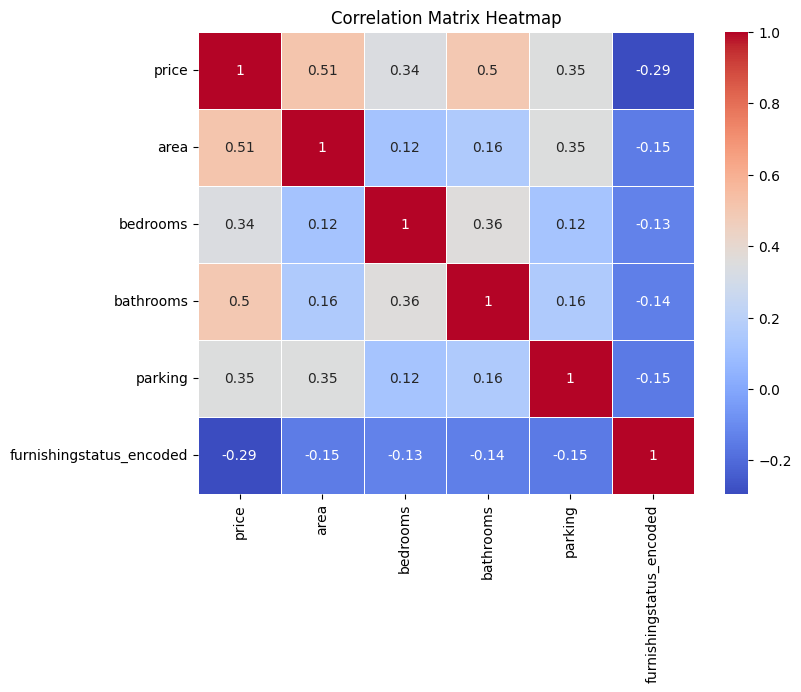

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Show the plot
plt.title('Correlation Matrix Heatmap')
plt.show()


In [ ]:
# Set a correlation threshold (e.g., 0.8)
threshold = 0.8

# Find pairs of highly correlated features
high_correlation_pairs = correlation_matrix[(correlation_matrix > threshold) | (correlation_matrix < -threshold)].stack().reset_index()

# Filter out self-correlations (where a feature is correlated with itself)
high_correlation_pairs = high_correlation_pairs[high_correlation_pairs['level_0'] != high_correlation_pairs['level_1']]

# Display the pairs of highly correlated features
print(high_correlation_pairs)


Empty DataFrame
Columns: [level_0, level_1, 0]
Index: []


In [ ]:
# Suppose 'area' and 'stories' are highly correlated, and you decide to drop 'stories'
df.drop(['stories'], axis=1, inplace=True)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical features (excluding categorical ones if needed)
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Check the first few rows of the scaled dataframe
print(df_scaled.head())


      price      area  bedrooms  bathrooms   parking  furnishingstatus_encoded
0  4.989544  1.117576  1.433543   1.511355  1.557872                 -0.699206
1  4.382366  1.855378  1.433543   5.665645  2.733955                 -0.699206
2  4.382366  2.334470  0.066320   1.511355  1.557872                 -0.699206
3  2.682265  0.700766  1.433543   1.511355  0.381788                 -0.699206
4  2.641787 -0.760465  1.433543   1.511355  1.557872                 -0.699206


In [ ]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = df_scaled.drop('price', axis=1)  # Assuming 'price' is the target variable
y = df_scaled['price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the datasets
print(X_train.shape, X_test.shape)


(428, 5) (108, 5)
